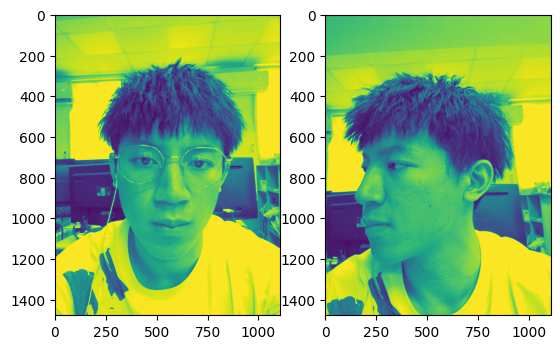

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 讀取圖檔
img1 = cv2.imread('source/input/selfie1.jpg',0)
img2 = cv2.imread('source/input/selfie2.jpg',0)

plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()

207


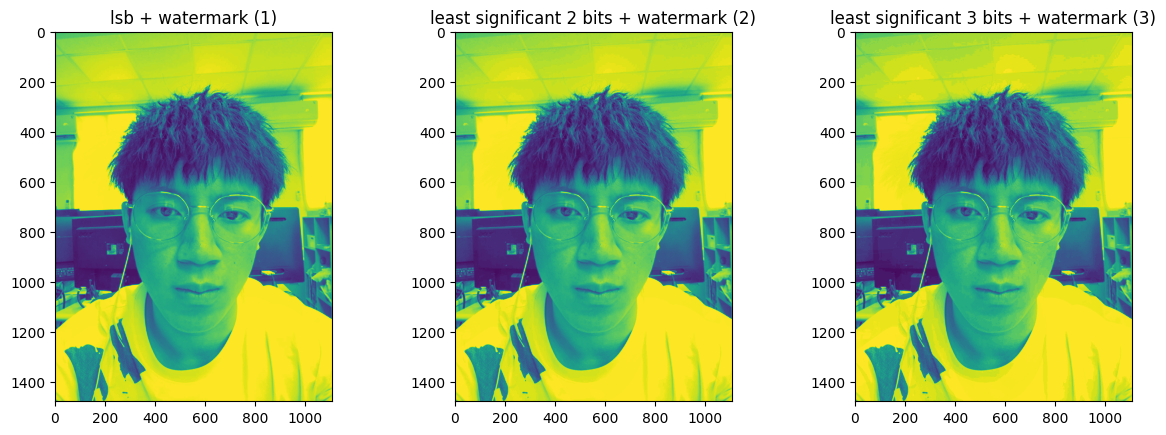

True

In [2]:
# 圖片寬高
height, width = img1.shape[:2]

# 設定加入浮水印圖片的初始直
lsb1bit_img1_watermark = img1.copy()
lsb2bit_img1_watermark = img1.copy()
lsb3bit_img1_watermark = img1.copy()

# 浮水印
watermark = img2.copy()
# 用for迴圈，跑過所有的pixel，執行每個pixel時候，原圖分別去除least significant 1、2、3 bits，再分別加入浮水印
for x in range(width):
    for y in range(height):
        lsb1bit_img1_watermark[y,x] = (img1[y,x] & 0b11111110) | ((watermark[y,x] & 0b10000000)>>7) # least significant 1 bits + watermark
        lsb2bit_img1_watermark[y,x] = (img1[y,x] & 0b11111100) | ((watermark[y,x] & 0b11000000)>>6) # least significant 2 bits + watermark
        lsb3bit_img1_watermark[y,x] = (img1[y,x] & 0b11111000) | ((watermark[y,x] & 0b11100000)>>5) # least significant 3 bits + watermark

# 顯示
plt.subplots_adjust(left=None, bottom=None, right=2, top=None,wspace=0, hspace=0)
plt.subplot(1,3,1)
plt.subplot(1,3,1).set_title('lsb + watermark (1)')
plt.imshow(lsb1bit_img1_watermark) 
plt.subplot(1,3,2)
plt.subplot(1,3,2).set_title('least significant 2 bits + watermark (2)')
plt.imshow(lsb2bit_img1_watermark)
plt.subplot(1,3,3)
plt.subplot(1,3,3).set_title('least significant 3 bits + watermark (3)')
plt.imshow(lsb3bit_img1_watermark)
plt.show()

# 存入檔案
cv2.imwrite('source/output/(1).jpg', lsb1bit_img1_watermark)
cv2.imwrite('source/output/(2).jpg', lsb2bit_img1_watermark)
cv2.imwrite('source/output/(3).jpg', lsb3bit_img1_watermark)

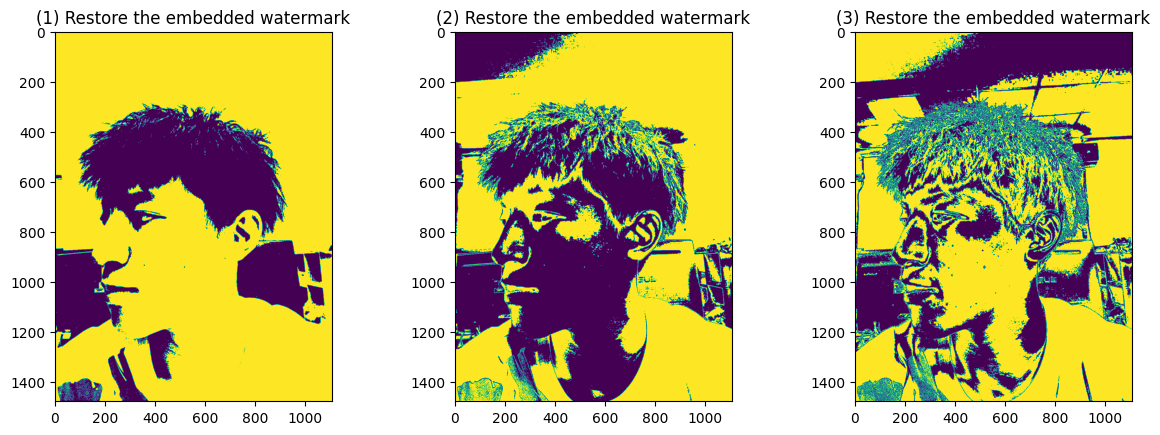

True

In [3]:

plt.subplots_adjust(left=None, bottom=None, right=2, top=None,wspace=0, hspace=0)
plt.subplot(1,3,1)
plt.subplot(1,3,1).set_title('(1) Restore the embedded watermark')
plt.imshow((lsb1bit_img1_watermark & 0b00000001)<<7) # 圖(1)最後 1 bit 圖片裡面藏的浮水印
plt.subplot(1,3,2)
plt.subplot(1,3,2).set_title('(2) Restore the embedded watermark') # 圖(2)最後 2 bits 圖片裡面藏的浮水印
plt.imshow((lsb2bit_img1_watermark & 0b00000011)<<7)
plt.subplot(1,3,3)
plt.subplot(1,3,3).set_title('(3) Restore the embedded watermark') # 圖(3)最後 3 bits 圖片裡面藏的浮水印
plt.imshow((lsb3bit_img1_watermark & 0b00000111)<<7)
plt.show()

# 檔案儲存 並提取出浮水印
cv2.imwrite('source/output/(1)Restore_the_embedded_watermark.jpg', (lsb1bit_img1_watermark & 0b00000001)<<7)
cv2.imwrite('source/output/(2)Restore_the_embedded_watermark.jpg', (lsb2bit_img1_watermark & 0b00000011)<<6)
cv2.imwrite('source/output/(3)Restore_the_embedded_watermark.jpg', (lsb3bit_img1_watermark & 0b00000111)<<5)